In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas_profiling as pdp
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import json
warnings.simplefilter('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

In [14]:
np.array(data.iloc[:, -1 * days :]).sum(axis=0)

array([53715, 48337, 46152, 37702, 36545, 36436, 40392, 50857, 52081,
       37328, 33981, 34068, 34615, 37649, 47887, 50915, 37259, 36536,
       38458, 41459, 39325, 52322, 57218, 40562, 37727, 37032, 38267,
       40887, 52711, 51421, 42035, 40117, 36606, 35009, 39652, 46181,
       47825, 37360, 35475, 34786, 34003, 45611, 53863, 46360, 36041,
       33857, 32359, 34681, 45536, 52672, 56425, 40418, 39683, 39134,
       38116, 43220, 56340, 53856, 42427, 39069, 35193, 37529, 41789,
       48362, 51640, 38059, 37570, 35343, 35033, 40517, 48962, 49795,
       38793, 35487, 34445, 34732, 42896, 50429, 53032, 43181, 44314,
       39601, 40763, 43805, 54239, 45609, 46400, 39379, 42248, 40503,
       44073, 54308, 59921, 42362, 38777, 37096, 36963, 42552, 51518,
       54338])

In [ ]:
aa=pd.read_csv(INPUT_DIR+'calendar.csv')

In [3]:
aa.tail(37)

NameError: name 'aa' is not defined

In [21]:
# LOAD DATA
INPUT_DIR  = '../../../input/m5-forecasting-accuracy/'
LOG_NAME = '06_16_22_11_22'
data = pd.read_csv(INPUT_DIR + "sales_train_evaluation.csv")
predicted = np.load(f"../log/{LOG_NAME}/pred_valid.npy")
json_load = json.load(open(f'../log/{LOG_NAME}/params.json', 'r'))

In [24]:
predicted.shape

(1, 9, 28)

In [25]:
predicted

array([[[-47403860.   , -46605364.   , -46902684.   , -44724588.   ,
         -44694228.   , -46584516.   , -46461290.   , -47462010.   ,
         -44702630.   , -46330244.   , -44703856.   , -43613624.   ,
         -46556660.   , -46431652.   , -43410890.   , -46620804.   ,
         -43582060.   , -46406884.   , -48962060.   , -46359040.   ,
         -48971070.   , -44173296.   , -46583772.   , -46415310.   ,
         -49365090.   , -44648540.   , -46436964.   , -46874228.   ],
        [-33203470.   , -33389666.   , -30544934.   , -30713842.   ,
         -30633230.   , -33438014.   , -30444820.   , -33282538.   ,
         -30594738.   , -30451142.   , -30602782.   , -30254030.   ,
         -33386154.   , -30439774.   , -30513666.   , -33344192.   ,
         -30543522.   , -30436750.   , -31191854.   , -30446506.   ,
         -31219576.   , -30362108.   , -33457978.   , -30387296.   ,
         -31014566.   , -30657034.   , -30519734.   , -30524974.   ],
        [-13012554.   , -1341363

In [22]:
# InverseするためのScalerを作る
data = data.drop('d_1792',axis=1)
use_days = json_load['use_days']
train_x = np.array(data.iloc[:, -1 * (28*2 + use_days) : -28*2]).sum(axis=0).reshape(1,-1)
# train_x = np.array(data.iloc[:, -1 * (28*1 + use_days) : -28*1]).sum(axis=0).reshape(1,-1)
mm = MinMaxScaler(feature_range=(0.05, 0.95))
mm.fit(train_x.T)

MinMaxScaler(copy=True, feature_range=(0.05, 0.95))

In [17]:
# 予測値をInverse Transform
predicted = mm.inverse_transform(predicted)

In [18]:
days = 100
sells = np.array(data.iloc[:, -1 * days : -28]).sum(axis=0)
sells.reshape(1,-1).shape

(1, 72)

In [19]:
np.concatenate([sells.reshape(1,-1),predicted],axis=1)

array([[53715.        , 48337.        , 46152.        , 37702.        ,
        36545.        , 36436.        , 40392.        , 50857.        ,
        52081.        , 37328.        , 33981.        , 34068.        ,
        34615.        , 37649.        , 47887.        , 50915.        ,
        37259.        , 36536.        , 38458.        , 41459.        ,
        39325.        , 52322.        , 57218.        , 40562.        ,
        37727.        , 37032.        , 38267.        , 40887.        ,
        52711.        , 51421.        , 42035.        , 40117.        ,
        36606.        , 35009.        , 39652.        , 46181.        ,
        47825.        , 37360.        , 35475.        , 34786.        ,
        34003.        , 45611.        , 53863.        , 46360.        ,
        36041.        , 33857.        , 32359.        , 34681.        ,
        45536.        , 52672.        , 56425.        , 40418.        ,
        39683.        , 39134.        , 38116.        , 43220.  

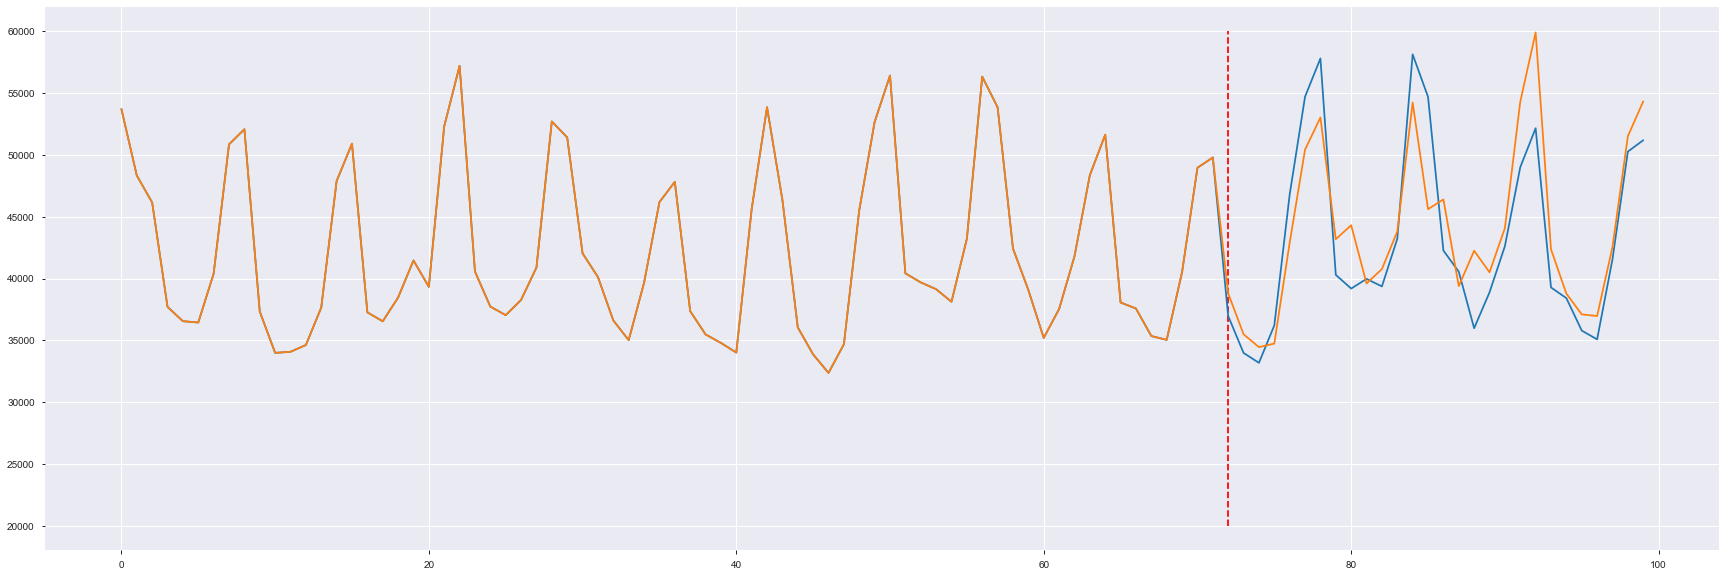

In [20]:
days = 100
f, ax = plt.subplots(figsize=(30, 10))
sells = np.array(data.iloc[:, -1 * days : -28]).sum(axis=0)
plt.plot(np.concatenate([sells.reshape(1,-1),predicted],axis=1).reshape(-1,))
plt.plot(np.array(data.iloc[:, -1 * days :]).sum(axis=0))
# sns.lineplot(predicted.iloc[i, :].index, predicted.iloc[i,:].values.astype("float32"))
plt.vlines(days-28, 20000, 60000, "red", linestyles='dashed')